In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Project/COVID-19-master

/content/drive/.shortcut-targets-by-id/148tduUm3_N2YmcWCKycU5qdfNmgLJccA/Project/COVID-19-master


In [8]:
!ls

 assets
 CLR
 confusion_matrix_test.jpg
 confusion_matrix_train.jpg
'Copy of Rishabmain.py'
 create_COVIDx.ipynb
 data
 Final_weights
 keras_model.py
 ktrain-master
 LICENSE
 LICENSE.md
 LRF
 main.py
 model1.h5
 model_32.h5
 model.h5
 Mykeras_model.py
 my-main.py
 Mymain.py
 Naddemmain.py
 preprocessing.ipynb
 __pycache__
 README-lindawangg-2020.3.27.md
 readme.md
 resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
 Rishabmain.py
 test_COVIDx5.txt
 tmp.hdf5
 train_COVIDx5.txt


In [ ]:
# #importing 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [5]:
from os import listdir
from os.path import isfile, join

    
xtest = np.load('data/x_test.npy')
ytest = np.load('data/y_test.npy')

In [10]:
def confusion_matrix_info(y_true, y_pred, labels=['normal', 'pneumonia',  'COVID-19'],
                          title='confusion matrix'):
    import seaborn as sns
    import pandas as pd
    from sklearn.metrics import confusion_matrix, f1_score
    import matplotlib.pyplot as plt
    C2 = confusion_matrix(y_true, y_pred)
    C = pd.DataFrame(C2, columns=labels, index=labels)
    m, _ = C2.shape
    for i in range(m):
        precision = C2[i, i] / sum(C2[:, i])
        recall = C2[i, i] / sum(C2[i, :])
        f1 = 2 * precision * recall / (precision + recall)
        print('In class {}:\t total samples: {}\t true predict samples: {}\t'
              'acc={:.4f},\trecall={:.4f},\tf1-score={:.4f}'.format(
            labels[i], sum(C2[i, :]), C2[i, i], precision, recall, f1))
    print('-' * 100, '\n', 'average f1={:.4f}'.format(f1_score(y_true, y_pred, average='micro')))
 
    f, ax = plt.subplots()
    sns.heatmap(C, annot=True, ax=ax, cmap=plt.cm.binary)
    ax.set_title(title)
    ax.set_xlabel('predict')
    ax.set_ylabel('true')
    plt.savefig(title+'.jpg')

Test using stage 3 model

In [6]:
def test(xt, yt):
    model = tf.keras.models.load_model('Final_model.h5')
    
    y_pred = model.predict(xt)
    confusion_matrix_info(yt, np.argmax(y_pred, axis=1),title='confusion_matrix_test')

In class normal:	 total samples: 100	 true predict samples: 90	acc=0.6122,	recall=0.9000,	f1-score=0.7287
In class pneumonia:	 total samples: 100	 true predict samples: 81	acc=0.6429,	recall=0.8100,	f1-score=0.7168
In class COVID-19:	 total samples: 100	 true predict samples: 25	acc=0.9259,	recall=0.2500,	f1-score=0.3937
---------------------------------------------------------------------------------------------------- 
 average f1=0.6533


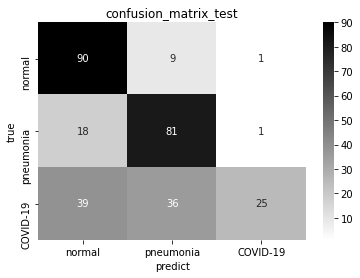

In [11]:
test(xtest, ytest)

Test using stage 2 model

In [ ]:
def test(xt, yt):
    model = tf.keras.models.load_model('model2.h5')
    
    y_pred = model.predict(xt)
    confusion_matrix_info(yt, np.argmax(y_pred, axis=1),title='confusion_matrix_test')

In [ ]:
test(xtest, ytest)